In [ ]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Read CSV into dataframe
csv = pd.read_csv("weather_data.csv")

# Separate target and features
dropped_df = csv.drop(["month", "day"], axis=1)

In [ ]:
city = dropped_df.groupby('city').median().reset_index()
city.head()
city.shape

(501, 47)

In [ ]:
us_city = city[city['longitude'] > -125]
us_city = us_city[us_city['longitude'] < -68]
us_city = us_city[us_city['latitude'] > 24.5]
us_city = us_city[us_city['latitude'] < 48.5]
us_city.shape

(387, 47)

In [ ]:
us_city.head()

,city,longitude,latitude,min_temp_k,max_temp_k,avgmin_temp_k,avgmax_temp_k,median_temp_k,mean_temp_k,p25_temp_k,...,p25_prec_mm,p75_prec_mm,st_dev_prec_mm,min_cloud_%,max_cloud_%,median_cloud_%,mean_cloud_%,p25_cloud_%,p75_cloud_%,stdev_cloud_%
2,Abilene,-99.747591,32.446450,278.305,306.190,286.355,299.625,292.050,291.880,287.345,...,0.0,0.0,0.125,0.0,92.0,1.0,22.635,1.0,40.0,33.810
3,Ada,-96.515346,47.299689,275.950,302.695,284.185,296.255,289.805,289.385,285.145,...,0.0,0.0,0.240,0.0,93.5,1.0,27.730,1.0,75.0,37.330
4,Adrian,-84.037305,41.897515,272.085,297.445,278.380,288.725,282.425,282.940,278.950,...,0.0,0.0,0.300,0.0,100.0,40.0,44.410,1.0,90.0,37.880
6,Alabaster,-86.816377,33.244281,278.945,302.480,285.235,297.330,290.700,290.520,286.730,...,0.0,0.0,0.350,0.0,92.0,16.0,34.325,1.0,75.0,36.960
7,Alamosa,-105.869600,37.469877,264.150,295.150,270.560,287.605,278.195,278.815,273.600,...,0.0,0.0,0.080,0.0,90.0,1.0,20.395,1.0,36.0,30.855


In [ ]:
X = us_city.drop(["city", "latitude"], axis=1)
y = us_city["latitude"]

In [ ]:
# Create training and testing sets for the Random Forest Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Set scaler to training data
scaler = StandardScaler().fit(X_train)

# Transform training data and testing data using scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[ 0.9920904  -0.83714656 -1.62138863 ... -0.19510473  0.84996466
   0.26695053]
 [ 0.47572586  1.1085699   0.84653778 ... -0.19510473  0.209482
   0.21120543]
 [ 0.04233173  1.86166867  1.71472125 ... -0.19510473  0.71119342
   0.31411946]
 ...
 [-1.32419575  0.29376943  0.94093255 ... -0.37136757 -2.82213593
  -3.3207471 ]
 [ 1.21522226  1.09504624  0.91112367 ... -0.19510473  0.209482
   0.31697819]
 [-1.39227151 -0.90138394 -0.42530754 ... -0.19510473 -0.61247075
  -0.44058346]]
[[ 1.18933349  2.12960616  0.97198346 ... -0.19510473 -0.26020528
  -0.78363025]
 [-1.38424397 -0.24379602 -0.71097592 ... -0.19510473 -0.00401222
   0.04682884]
 [-1.47914528 -0.73656435 -1.05874613 ... -0.19510473  0.209482
   0.32698372]
 ...
 [ 1.11378853 -0.54131652 -0.43524383 ... -0.19510473  0.84996466
   0.1826182 ]
 [ 1.15179631 -0.00290584 -0.17814229 ... -0.19510473  0.55107275
   0.23121649]
 [ 0.61225178  0.01061782 -0.17441618 ... -0.19510473  0.38027738
   0.62143221]]


In [ ]:
X_test.head()

,longitude,min_temp_k,max_temp_k,avgmin_temp_k,avgmax_temp_k,median_temp_k,mean_temp_k,p25_temp_k,p75_temp_k,stdev_temp_k,...,p25_prec_mm,p75_prec_mm,st_dev_prec_mm,min_cloud_%,max_cloud_%,median_cloud_%,mean_cloud_%,p25_cloud_%,p75_cloud_%,stdev_cloud_%
402,-80.470608,288.190,304.150,293.845,300.985,297.320,297.100,295.105,299.510,3.120,...,0.0,0.0,0.32,0.0,100.0,20.0,31.985,1.0,64.0,33.085
193,-119.119919,274.150,297.375,279.550,291.285,284.795,284.885,281.220,288.470,5.605,...,0.0,0.0,0.11,0.0,92.0,1.0,27.515,1.0,70.0,35.990
108,-120.545122,271.235,295.975,276.505,288.695,281.465,281.820,278.135,284.900,5.415,...,0.0,0.0,0.10,0.0,100.0,1.0,30.765,1.0,75.0,36.970
339,-122.674195,287.080,304.665,293.585,300.345,297.175,296.590,294.795,299.190,3.400,...,0.0,0.0,0.23,0.0,92.0,40.0,41.540,1.0,76.0,34.930
268,-80.232271,291.880,304.720,295.575,302.120,298.665,298.675,296.750,300.695,2.675,...,0.0,0.0,0.44,0.0,92.0,26.0,35.330,1.0,75.0,32.865


In [ ]:
# Linear Regression score before selection

non_selected = LinearRegression().fit(X_train_scaled, y_train)
print(non_selected.score(X_train_scaled, y_train))
print(non_selected.score(X_test_scaled, y_test))

0.6871559104623
0.30142831540760806


In [ ]:
rfr = RandomForestRegressor(random_state=1, n_estimators=1000, criterion="poisson").fit(X_train_scaled, y_train)
print(f'Training Score: {rfr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfr.score(X_test_scaled, y_test)}')

Training Score: 0.9358349044933996
Testing Score: 0.4848061025647661


In [ ]:
feature_importances = rfr.feature_importances_

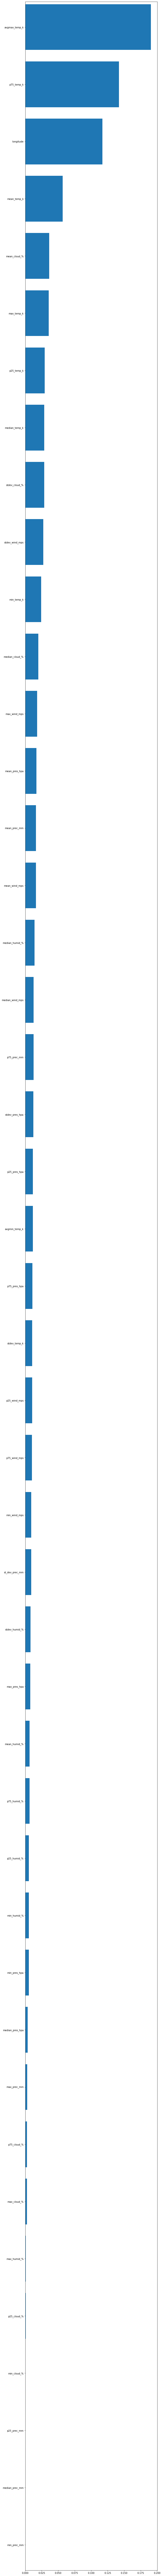

In [ ]:
import matplotlib.pyplot as plt

features = sorted(zip(X.columns, rfr.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [ ]:
sel = SelectFromModel(rfr)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestRegressor(criterion='poisson',
                                                n_estimators=1000,
                                                random_state=1))

In [ ]:
sel_idx = sel.get_support()
feature_name = X.columns[sel_idx]
feature_name

Index(['longitude', 'min_temp_k', 'max_temp_k', 'avgmax_temp_k',
       'median_temp_k', 'mean_temp_k', 'p25_temp_k', 'p75_temp_k',
       'stdev_wind_mps', 'mean_cloud_%', 'stdev_cloud_%'],
      dtype='object')

In [ ]:
# Using the selections from the RandomForestRegressor model, focus only on the features that are useful
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale data
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

X_selected_train.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(290, 11)

In [ ]:
X_selected_test

array([[ -77.113541 ,  277.75     ,  302.555    , ...,    1.71     ,
          32.85     ,   36.475    ],
       [ -86.8689419,  276.08     ,  301.185    , ...,    1.55     ,
          42.87     ,   37.69     ],
       [-107.851446 ,  267.15     ,  298.15     , ...,    2.08     ,
          20.73     ,   31.32     ],
       ...,
       [-114.3224495,  281.62     ,  309.165    , ...,    2.05     ,
           9.005    ,   21.2      ],
       [-121.8010799,  273.99     ,  297.53     , ...,    1.585    ,
          41.45     ,   38.03     ],
       [ -93.0860209,  279.26     ,  303.965    , ...,    1.43     ,
          34.965    ,   38.2      ]])

In [ ]:
model = LinearRegression().fit(X_selected_train_scaled, y_train)
print(model.score(X_selected_train_scaled, y_train))
print(model.score(X_selected_test_scaled, y_test))

0.5891796937500933
0.47865106397004953


In [ ]:
predictions = model.predict(X_selected_test_scaled)
predictions

array([34.65008099, 37.13841932, 39.77948308, 37.01712671, 37.56028831,
       37.32185391, 33.19096202, 33.84084689, 37.32254977, 37.79274514,
       34.32192749, 42.76993585, 37.13048043, 41.01791304, 31.21416293,
       36.81208105, 34.63693128, 41.94664894, 38.61888902, 39.06095618,
       42.18972983, 32.81189877, 40.07748291, 38.15132203, 40.58985263,
       33.73344402, 40.04559323, 39.02236653, 34.88256766, 31.9939728 ,
       34.38699751, 33.79501972, 39.14273841, 43.36929051, 34.74085821,
       33.52635061, 37.46786064, 34.73164595, 41.64026757, 41.02854131,
       44.23637181, 33.52032295, 36.69838395, 35.90508928, 32.62789718,
       36.98331295, 34.28257486, 34.8944095 , 39.50808162, 38.1012802 ,
       39.69919787, 37.68291458, 39.26386096, 36.71450616, 37.42065784,
       36.05494739, 42.39440429, 36.72982964, 37.87626233, 33.50224431,
       29.67286478, 39.96125386, 39.71579152, 43.37432842, 33.18481079,
       33.40519045, 37.41873898, 45.66729654, 42.37863132, 36.56

In [ ]:
pre_merge = pd.DataFrame(X_selected_test, columns=feature_name)
pre_merge["latitude_predict"] = predictions

final = us_city.merge(pre_merge[["latitude_predict", "longitude"]], on="longitude")
final

,city,longitude,latitude,min_temp_k,max_temp_k,avgmin_temp_k,avgmax_temp_k,median_temp_k,mean_temp_k,p25_temp_k,...,p75_prec_mm,st_dev_prec_mm,min_cloud_%,max_cloud_%,median_cloud_%,mean_cloud_%,p25_cloud_%,p75_cloud_%,stdev_cloud_%,latitude_predict
0,Alamosa,-105.869600,37.469877,264.150,295.150,270.560,287.605,278.195,278.815,273.600,...,0.0,0.08,0.0,90.0,1.00,20.395,1.00,36.00,30.855,42.769936
1,Albany,-73.754968,42.651167,280.940,304.150,287.600,299.305,292.685,292.710,289.385,...,0.0,0.30,0.0,92.0,4.75,31.915,1.00,75.00,36.890,31.993973
2,Alice,-98.069725,27.752249,284.155,307.470,291.925,302.590,296.540,296.575,293.530,...,0.0,0.21,0.0,92.0,40.00,42.340,1.00,90.00,37.340,31.214163
3,Ardmore,-97.143625,34.174261,277.085,303.505,285.310,296.785,290.705,290.410,286.070,...,0.0,0.26,0.0,92.0,1.00,27.310,1.00,71.75,37.160,36.054947
4,Astoria,-123.831256,46.187885,276.240,293.150,281.055,287.780,284.055,283.755,281.665,...,0.3,0.31,0.0,100.0,75.00,56.330,1.25,90.00,38.130,43.824407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,West Lafayette,-86.908066,40.425869,272.880,298.735,279.805,290.855,284.675,284.900,280.145,...,0.0,0.31,0.0,99.0,36.00,39.975,1.00,90.00,38.665,40.589853
93,West Plains,-91.852576,36.728165,274.180,300.860,282.495,293.990,287.660,287.660,283.295,...,0.0,0.27,0.0,97.0,8.00,33.575,1.00,75.00,37.875,37.682915
94,Wichita,-97.337545,37.692236,273.780,302.130,282.110,294.740,287.395,287.585,282.885,...,0.0,0.27,0.0,92.0,19.00,31.860,1.00,75.00,36.135,37.876262
95,Winnemucca,-117.734818,40.972428,266.920,298.150,273.605,291.545,281.255,281.835,276.165,...,0.0,0.07,0.0,92.0,1.00,23.295,1.00,40.00,33.635,41.028541


In [ ]:
from google.colab import files

final.to_csv('final_v9001.csv', index=False)
files.download('final_v9001.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>